**PREDICTIVE ANALYTICS: REGRESSION ASSIGNMENT BY AINA FARINA**

**Main Objective:** Create a machine learning regression model that predicts the "price" of the property with the given features.
<br>
<br>    •	Explore the data set, and do data cleaning if needed.
<br>    •	Do exploratory data analysis to understand the data. 
<br>    •	Set your target variable here, “price” and understand how the variables are related to the target variable.
<br>    •	Since the features are low here, use feature engineering to add the features.
<br>    •	Work on various ML algorithms for regression to select an ML model that performs best for the data at hand.
<br>    •	Evaluate your results using performance metrics and find the best algorithm that predicts the house price.

> **1. Import Python Libraries**

In [1]:
##for data manipulation 
import pandas as pd
import numpy as np

##for Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC


##for data visualisation
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as Axes3D
import seaborn as sns

> **2. Fetch Dataset**

In [2]:
df = pd.read_csv('C:/Users/farina/Documents/work/training/14. CADS/07. Advanced Analytics & Machine Learning/Assignment/Regression/raw_sales.csv')

## check data
df.head(5)

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3


> **3. EDA & Feature Engineering**

In [3]:
## shape of dataset
df.shape

(29580, 5)

In [4]:
## datatype of column and basic info on dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29580 entries, 0 to 29579
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   datesold      29580 non-null  object
 1   postcode      29580 non-null  int64 
 2   price         29580 non-null  int64 
 3   propertyType  29580 non-null  object
 4   bedrooms      29580 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


In [5]:
## summarize dataset statistical properties

df.describe()

,postcode,price,bedrooms
count,29580.000000,2.958000e+04,29580.000000
mean,2730.249730,6.097363e+05,3.250169
std,146.717292,2.817079e+05,0.951275
min,2600.000000,5.650000e+04,0.000000
25%,2607.000000,4.400000e+05,3.000000
50%,2615.000000,5.500000e+05,3.000000
75%,2905.000000,7.050000e+05,4.000000
max,2914.000000,8.000000e+06,5.000000


In [6]:
##check for null data
print(df.isnull().sum())

datesold        0
postcode        0
price           0
propertyType    0
bedrooms        0
dtype: int64


In [7]:
# Get the count of Zeros in df 
count = (df == 0).sum()
print('Count of zeros in dataset : ', count)

Count of zeros in dataset :  datesold         0
postcode         0
price            0
propertyType     0
bedrooms        30
dtype: int64


From a logical standpoint, there cannot exist a property with 0 bedrooms regardless of propertyType. Hence, we drop these 30 records. 

In [8]:
df = df[df['bedrooms'] != 0]

df.shape

(29550, 5)

In [9]:
##since property type is a categorical variable, we need to encode this feature, whereby 0=house and 1=unit

encoder = LabelEncoder()

df['propertyType'] = encoder.fit_transform(df['propertyType'])

df.head()

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,0,4
1,2007-02-27 00:00:00,2906,290000,0,3
2,2007-03-07 00:00:00,2905,328000,0,3
3,2007-03-09 00:00:00,2905,380000,0,4
4,2007-03-21 00:00:00,2906,310000,0,3


In [10]:
##convert datesold to year for it to be a meaningful feature since depending on events happened on a particular year, property price can fluctuate (e.g. recession)
df['year']=pd.DatetimeIndex(df['datesold']).year

df.drop(["datesold"],axis=1)


,postcode,price,propertyType,bedrooms,year
0,2607,525000,0,4,2007
1,2906,290000,0,3,2007
2,2905,328000,0,3,2007
3,2905,380000,0,4,2007
4,2906,310000,0,3,2007
...,...,...,...,...,...
29575,2900,500000,1,3,2019
29576,2612,560000,1,2,2019
29577,2912,464950,1,2,2019
29578,2601,589000,1,2,2019


**Lets visualise the data to better understand the trend**

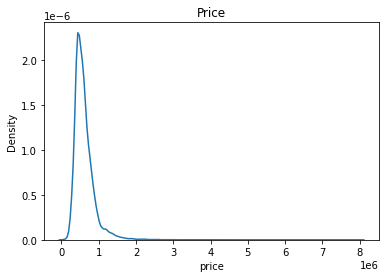

In [11]:
sns.kdeplot(x="price", data=df)
plt.title('Price')
plt.show()

Initial observations are price is highly skewed to the right

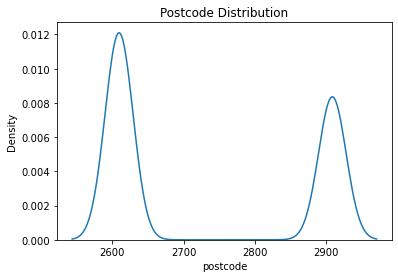

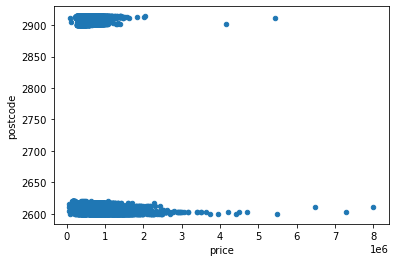

In [12]:
##visualise density of Postcode
sns.kdeplot(x="postcode", data=df)
plt.title('Postcode Distribution')
plt.show()

##visualise density of postcode v price
df.plot.scatter(x = 'price', y = 'postcode');

Initial observations are property with 26XX postcode have higher sales with higher price point

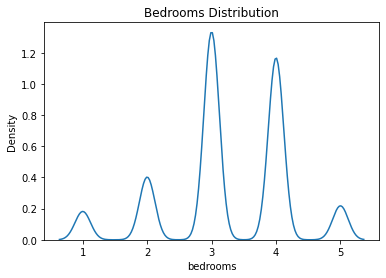

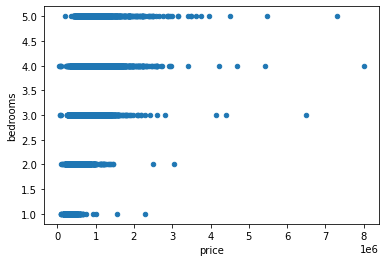

In [13]:
##visualise density of bedrooms
sns.kdeplot(x="bedrooms", data=df)
plt.title('Bedrooms Distribution')
plt.show()

##visualise density of bedrooms v price
df.plot.scatter(x = 'price', y = 'bedrooms');

Initial observations are that 3 and 4 bedroom property have highest volume of sales, while 4 bedroom property have a higher price point

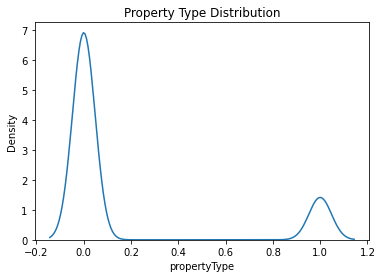

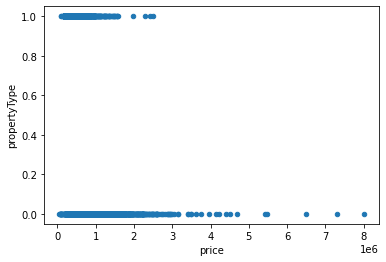

In [14]:
##visualise density of bedrooms
sns.kdeplot(x="propertyType", data=df)
plt.title('Property Type Distribution')
plt.show()

##visualise density of propertyType v price
df.plot.scatter(x = 'price', y = 'propertyType');

Initial observations are that houses have more sales and a higher price point in comparison to units

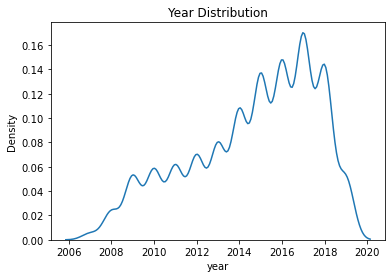

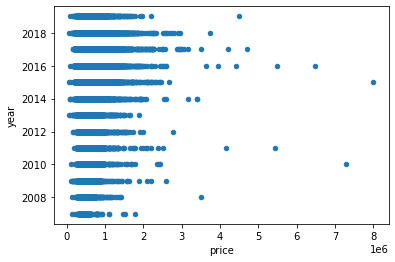

In [15]:
##visualise density of bedrooms
sns.kdeplot(x="year", data=df)
plt.title('Year Distribution')
plt.show()

##visualise density of propertyType v price
df.plot.scatter(x = 'price', y = 'year');

Initial observations shows that the year 2016 - 2018 had the highest number of prpoerty sales while the year 2016 had the highest price point in property selling price.

In [16]:
##check correlation of features 

df.corr()

,postcode,price,propertyType,bedrooms,year
postcode,1.000000,-0.150794,-0.257532,0.225476,-0.031028
price,-0.150794,1.000000,-0.299308,0.486524,0.172626
propertyType,-0.257532,-0.299308,1.000000,-0.674885,0.118045
bedrooms,0.225476,0.486524,-0.674885,1.000000,-0.062899
year,-0.031028,0.172626,0.118045,-0.062899,1.000000


<AxesSubplot:>

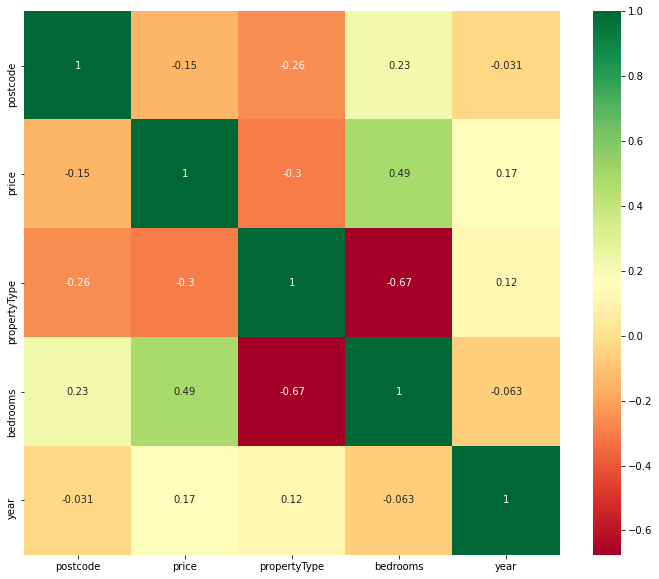

In [17]:
plt.figure(figsize=(12,10)) 
sns.heatmap(df.corr(), annot=True, cmap ='RdYlGn')

Initial observations indicate that there is somewhat significant positive correlation between price and number of bedrooms. In addtion, there is low positive correlation between price and year. However, there is low negative correlation between price and property type and postcode. 

> **4. Modelling**

**Data Splitting**

In [18]:
##scaling data 

scaler = StandardScaler()

x =  pd.DataFrame(scaler.fit_transform(df.drop(["datesold","price"],axis = 1),), columns=['postcode', 
'propertyType', 'bedrooms', 'year'])

x.head()

,postcode,propertyType,bedrooms,year
0,-0.840499,-0.452217,0.789074,-2.571758
1,1.197303,-0.452217,-0.267913,-2.571758
2,1.190488,-0.452217,-0.267913,-2.571758
3,1.190488,-0.452217,0.789074,-2.571758
4,1.197303,-0.452217,-0.267913,-2.571758


In [19]:
y = df['price']
y.head()

0    525000
1    290000
2    328000
3    380000
4    310000
Name: price, dtype: int64

In [20]:
x.shape, y.shape

((29550, 4), (29550,))

In [21]:
##data splitting
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
x_train.shape, x_test.shape

((23640, 4), (5910, 4))

In [22]:
y_train.shape, y_test.shape

((23640,), (5910,))

**Linear Regression**

In [23]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [24]:
lr.score(x_train,y_train)

0.3395161994429233

In [25]:
lr.score(x_test,y_test)

0.3819603092171807

In [26]:
y_pred = lr.predict(x_test)

print("Mean Squared Error for Linear Regression:", mean_squared_error(y_test,y_pred))
print("Root Mean Square Error for Linear Regression:", np.sqrt(mean_squared_error(y_test,y_pred)))
print("Mean Absolute Error for Linear Regression:", mean_absolute_error(y_test,y_pred))
print("R-squared for Linear Regression:", r2_score(y_test,y_pred))

Mean Squared Error for Linear Regression: 49516935184.42725
Root Mean Square Error for Linear Regression: 222524.01035489913
Mean Absolute Error for Linear Regression: 135624.71167149206
R-squared for Linear Regression: 0.3819603092171807


**Support Vector Machine**

In [27]:
svm = svm.SVR()
svm.fit(x_train,y_train)

SVR()

In [28]:
svm.score(x_train,y_train)

-0.03745052315085218

In [29]:
svm.score(x_test,y_test)

-0.04702984959501122

In [30]:
y_pred = svm.predict(x_test)

print("Mean Squared Error for SVM Regressor:", mean_squared_error(y_test,y_pred))
print("Root Mean Square Error for SVM Regressor:", np.sqrt(mean_squared_error(y_test,y_pred)))
print("Mean Absolute Error for SVM Regressor:", mean_absolute_error(y_test,y_pred))
print("R-squared for SVM Regressor:", r2_score(y_test,y_pred))

Mean Squared Error for SVM Regressor: 83887345702.48741
Root Mean Square Error for SVM Regressor: 289633.12259216385
Mean Absolute Error for SVM Regressor: 180454.97311440035
R-squared for SVM Regressor: -0.04702984959501122


**DecisionTree Regressor**

In [31]:
dtree = DecisionTreeRegressor()
dtree.fit(x_train, y_train)

DecisionTreeRegressor()

In [32]:
dtree.score(x_train,y_train)

0.6848127343100571

In [33]:
dtree.score(x_test,y_test)

0.6925594787126501

In [34]:
y_pred = dtree.predict(x_test)

print("Mean Squared Error for Decision Tree Regressor:", mean_squared_error(y_test,y_pred))
print("Root Mean Square Error for Decision Tree Regressor:", np.sqrt(mean_squared_error(y_test,y_pred)))
print("Mean Absolute Error for Decision Tree Regressor:", mean_absolute_error(y_test,y_pred))
print("R-squared for Decision Tree Regressor:", r2_score(y_test,y_pred))

Mean Squared Error for Decision Tree Regressor: 24631933179.517776
Root Mean Square Error for Decision Tree Regressor: 156945.63765685805
Mean Absolute Error for Decision Tree Regressor: 91245.82706330631
R-squared for Decision Tree Regressor: 0.6925594787126501


**Random Forest Regressor**

In [35]:
rfr = RandomForestRegressor(n_estimators=10)
rfr.fit(x_train, y_train)

RandomForestRegressor(n_estimators=10)

In [36]:
rfr.score(x_train,y_train)

0.6785650236171097

In [37]:
rfr.score(x_test,y_test)

0.6963439542875823

In [38]:
y_pred = rfr.predict(x_test)

print("Mean Squared Error for Random Forest Regressor:", mean_squared_error(y_test,y_pred))
print("Root Mean Square Error for Random Forest Regressor:", np.sqrt(mean_squared_error(y_test,y_pred)))
print("Mean Absolute Error for Random Forest Regressor:", mean_absolute_error(y_test,y_pred))
print("R-squared for Random Forest Regressor:", r2_score(y_test,y_pred))

Mean Squared Error for Random Forest Regressor: 24328723475.439373
Root Mean Square Error for Random Forest Regressor: 155976.67606228622
Mean Absolute Error for Random Forest Regressor: 91339.92140839327
R-squared for Random Forest Regressor: 0.6963439542875823


**Based on the 4 models, Random Forest Regressor is the best model since it has the lowest mean squared error and highest R-squared value.**